# Exploratory data analysis : Basic

DataSet : Housing Prices

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
house_data = pd.read_csv("housing_prices.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_data.shape

(1460, 81)

In [5]:
house_data.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### Univariate analysis

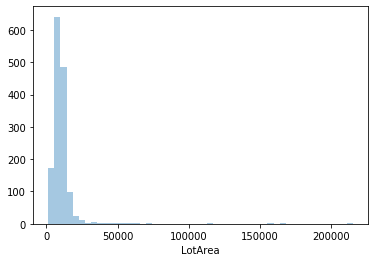

In [9]:
# Analyze the spread of the "LotArea" column

sns.distplot(house_data["LotArea"],kde = False)

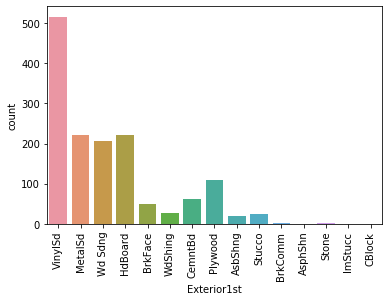

In [13]:
# analysing the different type of exteriors

plot = sns.countplot(x = "Exterior1st", data = house_data)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

### Bivariate analysis

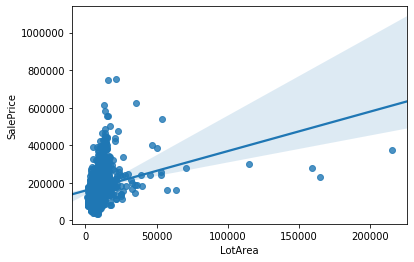

In [14]:
# analyse whether the price of the house depends on the lot area

sns.regplot(x="LotArea", y= "SalePrice", data = house_data)

In [16]:
# redrawing the graph after removing outliers
house_data["LotArea"].quantile([0.50,0.95,0.99])
sub_data = house_data.loc[house_data["LotArea"]< house_data["LotArea"].quantile(0.95)]

0.50     9478.50
0.95    17401.15
0.99    37567.64
Name: LotArea, dtype: float64

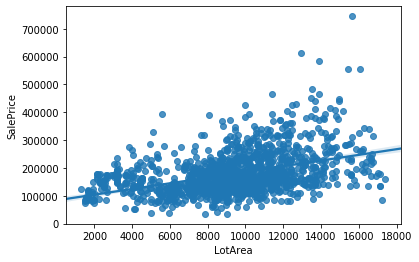

In [17]:
sns.regplot(x= "LotArea",y="SalePrice",data = sub_data)

In [19]:
house_data["LotArea"].corr(house_data["SalePrice"])

0.26384335387140573

In [21]:
sub_data["LotArea"].corr(sub_data["SalePrice"])

0.430209991289777

# Multiple Graph Plotting

In [24]:
# Analyzing the relationship between SalesPrice and all "Square Feet (SF)" related columns

Sqft_cols =[col_name for col_name in house_data.columns if "SF" in col_name ]

In [28]:
len(Sqft_cols)

9

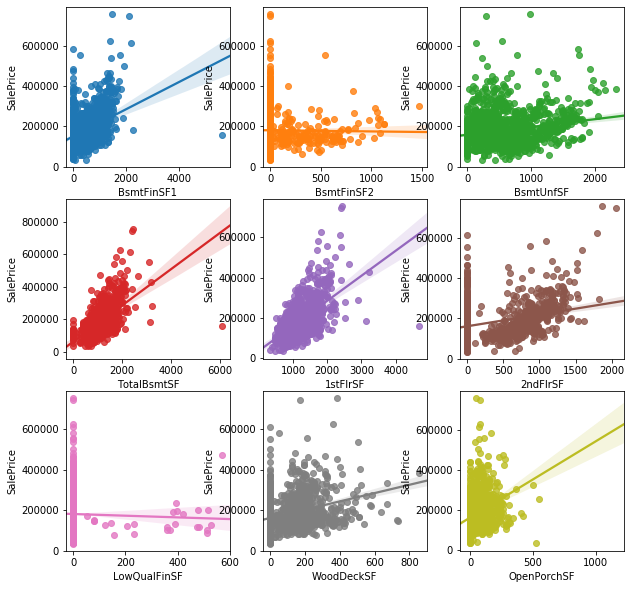

In [36]:
fig, axs = plt.subplots(nrows = 3,ncols = 3, figsize = (10,10))
for i in range(0, len(Sqft_cols)):
    rows = i // 3
    cols = i % 3
    ax = axs[rows, cols]
    plot = sns.regplot(x = Sqft_cols[i], y = "SalePrice", data = house_data, ax=ax)

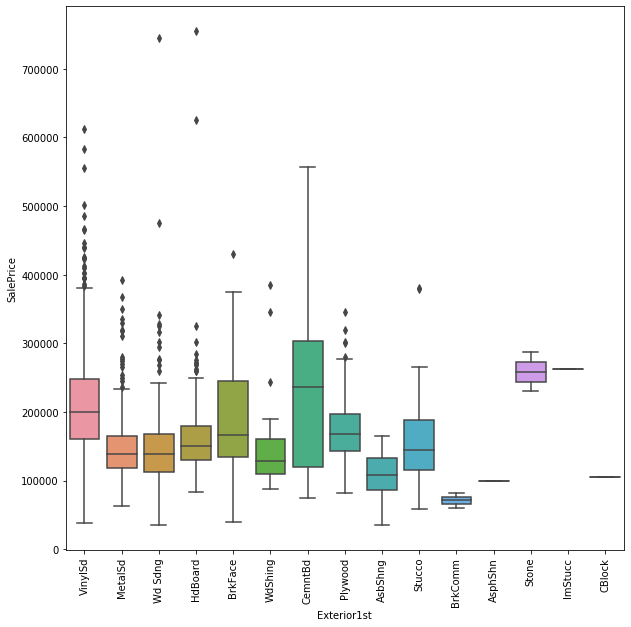

In [48]:
# analyse whether the price of the house impacted by the Exterior covering on house
fig,axs = plt.subplots(figsize=(10,10))

plot = sns.boxplot(x="Exterior1st", y= "SalePrice", data = house_data, ax=axs)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90);

In [57]:
# analysing the Price change depending on how old the house is

house_data["House_cond"] = np.where(house_data["YearBuilt"]>2000,"New","old")

In [53]:
house_data["House_cond"].value_counts()

old    1096
New     364
Name: House_cond, dtype: int64

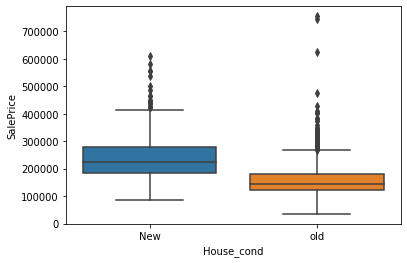

In [56]:
sns.boxplot(x= "House_cond",y = "SalePrice",data = house_data)

In [58]:
top_3_exterior = house_data["Exterior1st"].value_counts().head(3)
top_3_exterior = list(top_3_exterior.index)
house_data["Exterior_new"] = np.where(house_data["Exterior1st"].isin(top_3_exterior),house_data["Exterior1st"],"Others")

In [59]:
house_data.groupby(["Exterior_new","House_cond"]).agg({"SalePrice":["count", "median"]})

SalePrice          
                            count    median
Exterior_new House_cond                    
HdBoard      New                1  198500.0
             old              221  149900.0
MetalSd      New               19  222000.0
             old              201  135000.0
Others       New               35  303477.0
             old              468  142976.5
VinylSd      New              309  219500.0
             old              206  167075.0

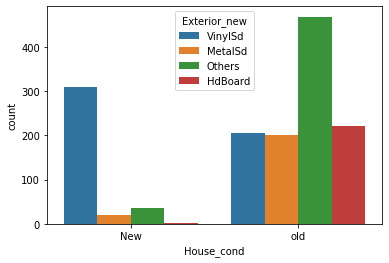

In [60]:
# analysing how the type of exterior changed for newer homes compared to older houses

sns.countplot(x = "House_cond", data = house_data, hue = "Exterior_new");